In [1]:
import pandas as pd

base = pd.read_csv("BD/movies.csv")
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       9515 non-null   int64 
 1   ID               9515 non-null   int64 
 2   Title            9515 non-null   object
 3   Year             9515 non-null   int64 
 4   Age              5338 non-null   object
 5   Rotten Tomatoes  9508 non-null   object
 6   Netflix          9515 non-null   int64 
 7   Hulu             9515 non-null   int64 
 8   Prime Video      9515 non-null   int64 
 9   Disney+          9515 non-null   int64 
 10  Type             9515 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 817.8+ KB


In [2]:
base.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


## Análisis de la data

In [18]:
cantidad_year = base.groupby(by = 'Year').count()[['ID']].reset_index()
cantidad_year.columns=['Year','Amount']
cantidad_year

,Year,Amount
0,1914,1
1,1915,2
2,1916,1
3,1919,1
4,1920,2
...,...,...
98,2017,831
99,2018,945
100,2019,1014
101,2020,862


In [36]:
year = 2021
base_filtrada_year=base[base['Year']==year]

cantidad_year = base.groupby(by = 'Age').count()[['ID']].reset_index()
cantidad_year.columns=['Age','Amount']
cantidad_year
# base_filtrada_year

,Age,Amount
0,13+,998
1,16+,276
2,18+,2276
3,7+,1090
4,all,698


In [3]:
def select_characters(n):
    try:
        return n[:2]
    except:
        print(n)
        return 0

# Método 1: Puede tener errores con pelis que tengan 100/100
base['Ranking'] = base['Rotten Tomatoes'].apply(select_characters).astype(int)
base.info()

# Método 2: Utilizando el método split
base['Ranking'] = base['Rotten Tomatoes'].str.split('/',expand=True)[0].fillna(0).astype(int)

year = 1980
base_filtrada_year=base[base['Year']==year]

base.sort_values(by='Ranking', ascending=False)[:10][['Title','Age']].reset_index(drop = True)

nan
nan
nan
nan
nan
nan
nan
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       9515 non-null   int64 
 1   ID               9515 non-null   int64 
 2   Title            9515 non-null   object
 3   Year             9515 non-null   int64 
 4   Age              5338 non-null   object
 5   Rotten Tomatoes  9508 non-null   object
 6   Netflix          9515 non-null   int64 
 7   Hulu             9515 non-null   int64 
 8   Prime Video      9515 non-null   int64 
 9   Disney+          9515 non-null   int64 
 10  Type             9515 non-null   int64 
 11  Ranking          9515 non-null   int32 
dtypes: int32(1), int64(8), object(3)
memory usage: 855.0+ KB


,Title,Age
0,The Irishman,18+
1,Dangal,7+
2,Mary Poppins,all
3,David Attenborough: A Life on Our Planet,7+
4,The Dark Knight,13+
5,Lagaan: Once Upon a Time in India,7+
6,Roma,18+
7,To All the Boys I've Loved Before,13+
8,The Social Dilemma,13+
9,Tumbbad,NaN


In [4]:
year = 1980
base_filtrada_year=base[base['Year']==year]

base_filtrada_year[['Netflix','Hulu','Prime Video','Disney+']].sum()

Netflix         4
Hulu            2
Prime Video    16
Disney+         4
dtype: int64

# Gráfica de barras con el primer análisis

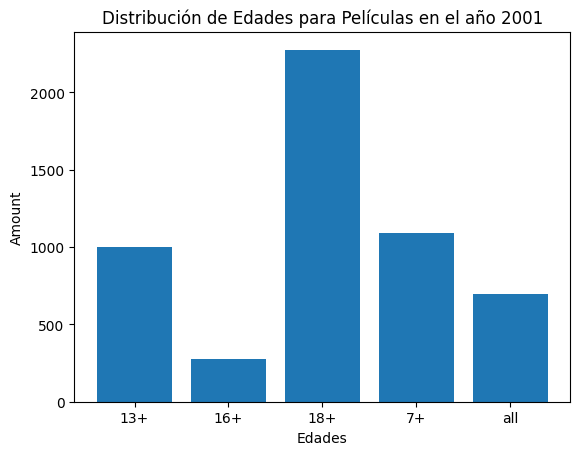

In [29]:
import matplotlib.pyplot as plt

# Edades para ver la película en el año seleccionado
year =2001
base_filtrada_year=base[base['Year']==year]

cantidad_year = base.groupby(by = 'Age').count()[['ID']].reset_index()
cantidad_year.columns=['Age','Amount']
cantidad_year

# Creación del gráfico de barras
plt.bar(cantidad_year['Age'], cantidad_year['Amount'])
plt.xlabel('Edades')
plt.ylabel('Amount')
plt.title(f'Distribución de Edades para Películas en el año {year}')
plt.savefig(f'Imagenes/bar_ages_{year}.png')
plt.show()


In [23]:
import altair as alt

years = base[base['Year'] >= 1990]['Year'].unique()
years.sort()
 
for year in years:
    base_filtrada_year = base[base['Year']==year]
    cantidad_year = base_filtrada_year.groupby(by='Age').count()[['ID']].reset_index()
    cantidad_year.columns = ['Age','Amount']
    cantidad_year['Year'] = year
 
    if year == years[0]:
        df = cantidad_year
    else:
        df = pd.concat([df,cantidad_year])
 
df['Year'] = df['Year'].astype(str)
chart = alt.Chart(df).mark_bar().encode(
    x='Year:O',
    y='Amount:Q',
    color='Age:N'
)
chart

alt.Chart(...)

# Gráfica de donut para el cuarto análisis

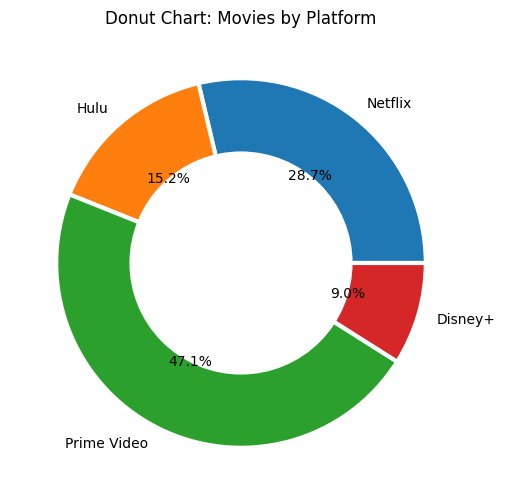

In [26]:
import matplotlib.pyplot as plt
year = 2010
 
base_filtrada_year = base[base['Year']==year]
cantidad_year = base_filtrada_year[['Netflix','Hulu','Prime Video','Disney+']].sum().reset_index()
cantidad_year.columns = ['Platform','Amount']
 
plt.figure(figsize=(6, 6))
plt.pie(cantidad_year['Amount'], labels=cantidad_year['Platform'], autopct='%1.1f%%', wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))
plt.title('Donut Chart: Movies by Platform')
plt.savefig('Imagenes/dount_platform_year.png')
plt.show()

# Generación de PDF

In [2]:
from fpdf import FPDF

class PDFWithBackground(FPDF):
    def __init__(self):
        super().__init__()
        self.background = None

    def set_background(self, image_path):
        self.background = image_path

    def add_page(self, orientation=''):
        super().add_page(orientation)
        if self.background:
            self.image(self.background, 0, 0, self.w, self.h)

    def footer(self):
        # Posición a 1.5 cm desde el fondo
        self.set_y(-15)
        # Configurar la fuente para el pie de página
        self.set_font('Arial', 'I', 8)
        # Número de página
        self.cell(0, 10, 'Página ' + str(self.page_no()), 0, 0, 'C')

In [26]:
pdf = PDFWithBackground()
pdf.set_background('Imagenes\White Blue Corporate Annual Report.png')
pdf.add_page()

pdf.set_x(50)
pdf.set_y(20)
pdf.set_font('Courier',style='B', size=20) # Arial, Times, Courier
pdf.cell(0,0,'Mi Primer Reporte',0,1,'L')

pdf.set_x(10)
pdf.set_y(28)
pdf.set_font('Courier',size=14)
pdf.cell(0,0,'Desarrollado con Python',0,1,'L')

pdf.set_x(10)
pdf.set_y(38)
pdf.set_font('Courier','BI',size=14)
pdf.cell(1,0,'Reporte general por años y edades permitidas',0,1,'L')


imagen = 'bar_year_age.png'
pdf.image(f'Imagenes/{imagen}', x=17, y=45,
          w=150,h=50)


pdf.output('MiPrimerPDF.pdf')

''